In [1]:
import numpy as np 
import pandas as pd
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

# 讀取資料

In [6]:
def transform_data(df):
    # 取得資料名稱
    data_index = df.columns[1:]  
   
    flatten_data = df[data_index].values.reshape(-1)  # 攤平資料
    
    # 轉換成字串
    str_data = "<SEP>".join(flatten_data.astype('str'))
    filter_data = str_data.replace(',',"").replace('X',"")
    
    # 切割回陣列
    x_data = filter_data.split("<SEP>")
    
    return x_data
    
x = []
for path in os.listdir('Stock'):
    file_path = f'Stock/{path}'
    df = pd.read_csv(file_path)
    data = transform_data(df)
    x.extend(data)
    
sc = MinMaxScaler()

x = np.array(x).astype('float')
x = x.reshape(-1, len(df.columns[1:]))
x = sc.fit_transform(x)
y = x[:,5]

(3200, 8)


# 切割資料

In [7]:
def split_data(datas, labels, split_num = 10):
    max_len = len(datas)
    x, y = [], []
    for i in range(max_len - split_num -1):
        x.append(datas[i: i+split_num])
        y.append(labels[split_num+i+1])
    
    return np.array(x), np.array(y)
x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8, random_state=22, shuffle=False)

x_train, y_train = split_data(x_train, y_train)
x_valid, y_valid = split_data(x_valid, y_valid)

# 建立LSTM模型

In [8]:
model= Sequential()

model.add(Bidirectional(LSTM(128,input_shape=(x_train.shape[1], x_train.shape[-1]),return_sequences=True,activation='relu')))
model.add(Bidirectional(LSTM(64,return_sequences=False,activation='relu')))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_valid, y_valid))

Epoch 1/10
40/40 [==============================] - 1s 24ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 2/10
40/40 [==============================] - 0s 12ms/step - loss: 1.0225e-04 - val_loss: 0.0038
Epoch 3/10
40/40 [==============================] - 0s 12ms/step - loss: 7.5100e-05 - val_loss: 0.0027
Epoch 4/10
40/40 [==============================] - 1s 13ms/step - loss: 7.4163e-05 - val_loss: 0.0032
Epoch 5/10
40/40 [==============================] - 1s 14ms/step - loss: 6.1974e-05 - val_loss: 0.0029
Epoch 6/10
40/40 [==============================] - 1s 13ms/step - loss: 6.0994e-05 - val_loss: 0.0035
Epoch 7/10
40/40 [==============================] - 1s 13ms/step - loss: 5.6382e-05 - val_loss: 0.0041
Epoch 8/10
40/40 [==============================] - 1s 13ms/step - loss: 5.5908e-05 - val_loss: 0.0033
Epoch 9/10
40/40 [==============================] - 1s 13ms/step - loss: 5.1920e-05 - val_loss: 0.0036
Epoch 10/10
40/40 [==============================] - 1s 15ms/step - loss: 5.5

# 繪製折線圖

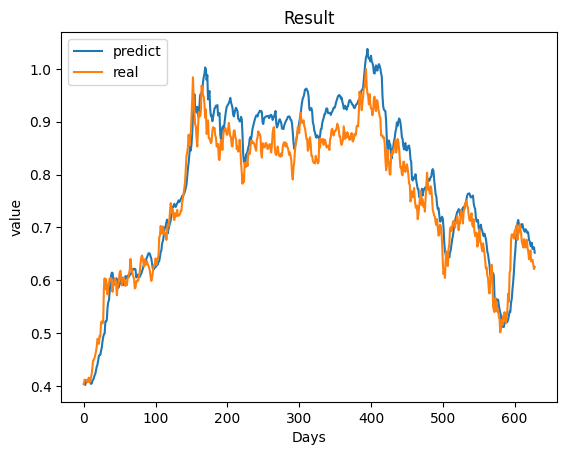

In [10]:
y_pred = model.predict(x_valid)

plt.plot(y_pred)
plt.plot(y_valid)

plt.title('Result')
plt.ylabel('value')
plt.xlabel('Days')

plt.legend(['predict', 'real'], loc='upper left')
plt.show()